In [1]:
import scanpy as sc
import anndata
import pl as pl
import tl as tl
import numpy as np

In [2]:
filelocation = r"/home/foelix/Öffentlich/VBh_converted.h5ad"
adata = anndata.read_h5ad(filelocation)
sc.pp.subsample(adata, 0.05)
adata.X = np.arcsinh(adata.X / 10)

sc.pp.neighbors(adata, n_neighbors=20)

In [3]:
imp_channels = [1, 3, 5, 7, 9, 13]
imp_channels_names = list(adata.var_names.values[imp_channels])

In [4]:
adata = tl.hsne(adata, imp_channel_ind=imp_channels, num_scales=2)

T
P
X_hsne
lm_ind
Scale Number 0:
I
W
T
lm_ind
P
X_hsne
Scale Number 1:
I
W
T
lm_ind
P
X_hsne


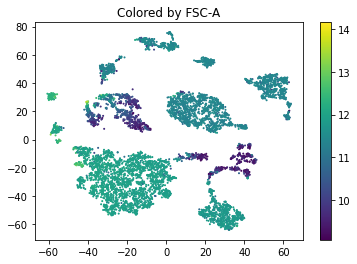

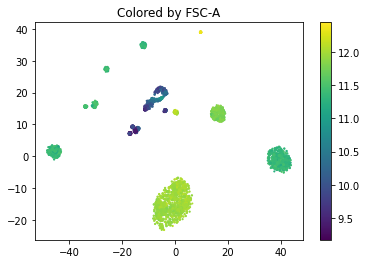

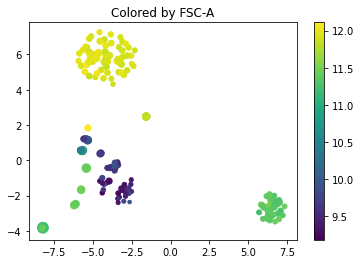

In [5]:
for scale in enumerate(adata.uns['hsne_scales']):
    pl.hsne(adata, channels_to_plot=['FSC-A'], scale_num=scale[0])

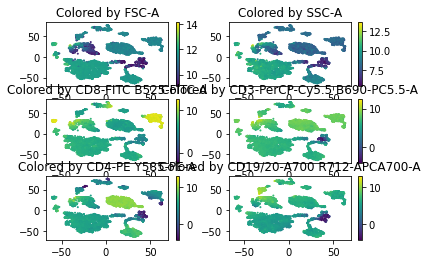

In [6]:
pl.hsne(adata, channels_to_plot=imp_channels_names, scale_num=0)

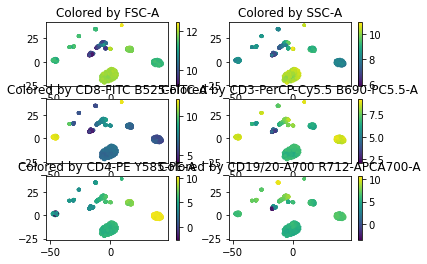

In [7]:
pl.hsne(adata, channels_to_plot=imp_channels_names, scale_num=1)

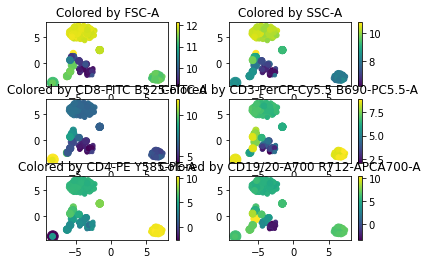

In [8]:
pl.hsne(adata, channels_to_plot=imp_channels_names, scale_num=2)

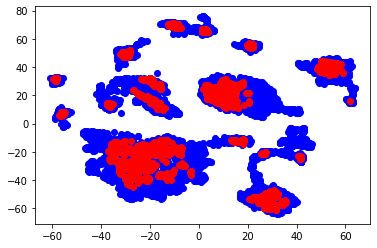

In [9]:
import matplotlib.pyplot as plt
s = adata.uns['hsne_scales']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(s[0].X_hsne[:, 0], s[0].X_hsne[:, 1], c='blue')
ax.scatter(s[0].X_hsne[s[0].lm_ind, 0], s[0].X_hsne[s[0].lm_ind, 1], c='red')
plt.show()